# Module 3 : Concentration de CO$_{\textbf{2}}$ dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from urllib.request import urlretrieve
import datetime
import numpy as np

## Importation et formatage des données

Les données sont disponibles sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée (29/03/1958 à aujourd'hui 09/12/2024). Nous téléchargeons à ce jour dans le dossier local à [cette URL](https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv) à l'aide de la bibliothèque `urllib.request`. Si le fichier est déjà téléchargé, nous l'importons depuis le dossier local.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_file = "data_keeling.csv"

if not os.path.exists(data_file):
    urlretrieve(data_url, data_file)
    print(f"File downloaded and saved as {data_file}")
else:
    print(f"File {data_file} found at {os.path.abspath(data_file)}")

File data_keeling.csv found at /home/jovyan/work/module3/exo3/data_keeling.csv


Le fichier contient 44 lignes de commentaires (ignorées en précisant `skiprows=44`) expliquant le fichier et les méthodes de mesure. Il contient ensuite deux colonnes:
- Date (premier jour de la période d'une semaine)
- Concentration en CO$_2$ (ppm)

Aucune ligne ne définit le nom des colonnes. Il faut donc préciser `header=None`, puis préciser le nom des colonnes par la suite.

In [3]:
raw_data = pd.read_csv(data_file, skiprows=44, header=None)
raw_data.columns = ["Date", "Concentration en CO2 (ppm)"]
raw_data

Date  Concentration en CO2 (ppm)
0     1958-03-29                      316.19
1     1958-04-05                      317.31
2     1958-04-12                      317.69
3     1958-04-19                      317.58
4     1958-04-26                      316.48
5     1958-05-03                      316.95
6     1958-05-17                      317.56
7     1958-05-24                      317.99
8     1958-07-05                      315.85
9     1958-07-12                      315.85
10    1958-07-19                      315.46
11    1958-07-26                      315.59
12    1958-08-02                      315.64
13    1958-08-09                      315.10
14    1958-08-16                      315.09
15    1958-08-30                      314.14
16    1958-09-06                      313.54
17    1958-11-08                      313.05
18    1958-11-15                      313.26
19    1958-11-22                      313.57
20    1958-11-29                      314.01
21    1958-12-06                      314.56
22    1958-12-13                      314.41
23    1958-12-20                      314.77
24    1958-12-27                      315.21
25    1959-01-03                      315.24
26    1959-01-10                      315.50
27    1959-01-17                      315.69
28    1959-01-24                      315.86
29    1959-01-31                      315.42
...          ...                         ...
3373  2024-04-20                      426.91
3374  2024-04-27                      427.13
3375  2024-05-04                      426.51
3376  2024-05-11                      427.20
3377  2024-05-18                      426.26
3378  2024-05-25                      426.68
3379  2024-06-01                      426.78
3380  2024-06-08                      427.01
3381  2024-06-15                      427.10
3382  2024-06-22                      426.54
3383  2024-06-29                      425.41
3384  2024-07-06                      425.73
3385  2024-07-13                      426.10
3386  2024-07-20                      424.36
3387  2024-07-27                      424.72
3388  2024-08-03                      424.42
3389  2024-08-10                      422.50
3390  2024-08-17                      422.80
3391  2024-08-24                      421.45
3392  2024-08-31                      421.57
3393  2024-09-07                      421.81
3394  2024-09-14                      421.39
3395  2024-09-21                      421.77
3396  2024-09-28                      421.51
3397  2024-10-05                      421.86
3398  2024-10-12                      422.13
3399  2024-10-19                      422.16
3400  2024-10-26                      422.36
3401  2024-11-02                      423.15
3402  2024-11-09                      423.18

[3403 rows x 2 columns]

Vérifions si le jeu de données contient des lignes vides.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Concentration en CO2 (ppm)]
Index: []

Aucune ligne n'est vide. Traduisons maintenant la colonne "Date" en format date utilisé par pandas, puis passons-là en indice du tableau.

In [5]:
raw_data["Date"] = pd.to_datetime(raw_data["Date"])
data = pd.Series(data = raw_data["Concentration en CO2 (ppm)"].tolist(), index = raw_data["Date"])
data

Date
1958-03-29    316.19
1958-04-05    317.31
1958-04-12    317.69
1958-04-19    317.58
1958-04-26    316.48
1958-05-03    316.95
1958-05-17    317.56
1958-05-24    317.99
1958-07-05    315.85
1958-07-12    315.85
1958-07-19    315.46
1958-07-26    315.59
1958-08-02    315.64
1958-08-09    315.10
1958-08-16    315.09
1958-08-30    314.14
1958-09-06    313.54
1958-11-08    313.05
1958-11-15    313.26
1958-11-22    313.57
1958-11-29    314.01
1958-12-06    314.56
1958-12-13    314.41
1958-12-20    314.77
1958-12-27    315.21
1959-01-03    315.24
1959-01-10    315.50
1959-01-17    315.69
1959-01-24    315.86
1959-01-31    315.42
               ...  
2024-04-20    426.91
2024-04-27    427.13
2024-05-04    426.51
2024-05-11    427.20
2024-05-18    426.26
2024-05-25    426.68
2024-06-01    426.78
2024-06-08    427.01
2024-06-15    427.10
2024-06-22    426.54
2024-06-29    425.41
2024-07-06    425.73
2024-07-13    426.10
2024-07-20    424.36
2024-07-27    424.72
2024-08-03    424.42
2024-08-

Vérifions si des données sont manquantes, _i.e._ si deux dates ont plus d'une semaine d'écart.

In [6]:
dates = data.index
for d1, d2 in zip(dates[:-1], dates[1:]):
    delta = d2 - d1
    if delta - pd.Timedelta(1,'W') > pd.Timedelta('1s'):
        print(d1, d2)

1958-05-03 00:00:00 1958-05-17 00:00:00
1958-05-24 00:00:00 1958-07-05 00:00:00
1958-08-16 00:00:00 1958-08-30 00:00:00
1958-09-06 00:00:00 1958-11-08 00:00:00
1959-01-31 00:00:00 1959-02-14 00:00:00
1959-03-07 00:00:00 1959-03-21 00:00:00
1959-05-23 00:00:00 1959-06-06 00:00:00
1959-08-08 00:00:00 1959-08-22 00:00:00
1962-08-18 00:00:00 1962-09-15 00:00:00
1962-12-22 00:00:00 1963-01-05 00:00:00
1963-02-09 00:00:00 1963-02-23 00:00:00
1963-04-27 00:00:00 1963-05-11 00:00:00
1963-11-16 00:00:00 1963-11-30 00:00:00
1964-01-18 00:00:00 1964-05-30 00:00:00
1964-06-06 00:00:00 1964-06-27 00:00:00
1964-08-01 00:00:00 1964-08-15 00:00:00
1966-07-09 00:00:00 1966-08-06 00:00:00
1966-10-29 00:00:00 1966-11-12 00:00:00
1967-01-14 00:00:00 1967-02-04 00:00:00
1976-06-19 00:00:00 1976-07-03 00:00:00
1984-03-24 00:00:00 1984-04-28 00:00:00
1985-07-27 00:00:00 1985-08-10 00:00:00
2003-06-07 00:00:00 2003-06-21 00:00:00
2003-10-04 00:00:00 2003-10-25 00:00:00
2005-02-19 00:00:00 2005-03-26 00:00:00


Quelques données sont manquantes, mais leur nombre est largement inférieur au nombre de données, et sont éparses après les années 1960. Nous pouvons donc considérer l'erreur induite par le manque de données négligeable.

Néanmoins, nous pouvons combler ces données en utilisant des moyennes glissantes pour aider à la visualisation, tout en gardant en mémoire les dates avec des données interpolées, afin de les exclure de l'analyse quantitative. Cela est effectué à l'aide du tableau `interpolated_marks` :

In [7]:
full_index = pd.date_range(start=data.index[0], end=data.index[-1], freq='7D')
full_data = data.reindex(full_index)
while full_data.isna().any():
    rolling_mean = full_data.rolling(window=5, min_periods=3).mean()
    full_data[full_data.isna()] = rolling_mean[full_data.isna()]
interpolated_marks = pd.Series(data=np.where(data.reindex(full_index).isna(), 1, 0), index=full_index)
interpolated_marks

1958-03-29    0
1958-04-05    0
1958-04-12    0
1958-04-19    0
1958-04-26    0
1958-05-03    0
1958-05-10    1
1958-05-17    0
1958-05-24    0
1958-05-31    1
1958-06-07    1
1958-06-14    1
1958-06-21    1
1958-06-28    1
1958-07-05    0
1958-07-12    0
1958-07-19    0
1958-07-26    0
1958-08-02    0
1958-08-09    0
1958-08-16    0
1958-08-23    1
1958-08-30    0
1958-09-06    0
1958-09-13    1
1958-09-20    1
1958-09-27    1
1958-10-04    1
1958-10-11    1
1958-10-18    1
             ..
2024-04-20    0
2024-04-27    0
2024-05-04    0
2024-05-11    0
2024-05-18    0
2024-05-25    0
2024-06-01    0
2024-06-08    0
2024-06-15    0
2024-06-22    0
2024-06-29    0
2024-07-06    0
2024-07-13    0
2024-07-20    0
2024-07-27    0
2024-08-03    0
2024-08-10    0
2024-08-17    0
2024-08-24    0
2024-08-31    0
2024-09-07    0
2024-09-14    0
2024-09-21    0
2024-09-28    0
2024-10-05    0
2024-10-12    0
2024-10-19    0
2024-10-26    0
2024-11-02    0
2024-11-09    0
Freq: 7D, Length: 3477, 

## Interprétation des données

Commençons par représenter l'évolution de la concentration en CO$_2$ depuis 1958.

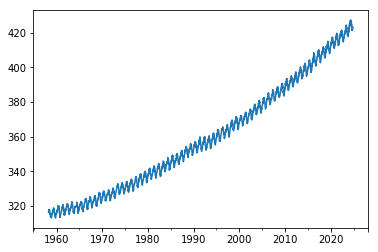

In [8]:
full_data.plot()

On observe une oscillation rapide autour d'une évolution plus lente. Nous pouvons donc modéliser l'évolution temporelle comme :

$$C(t)=f(t)+A\cos\Big(\frac{2\pi}{T}(t-t_0)\Big)\ ,$$

où $C(t)$ est la concentration en CO$_2$, $t$ est le temps, $f(t)$ est une fonction monotone qui croît lentement et $A$ est l'amplitude des oscillations autour de $f$, $T$ est leur fréquence et $t_0$ est leur origine temporelle.

### Caractérisation des oscillations

Regardons les dernières années afin de mieux caractériser les oscillations rapides.

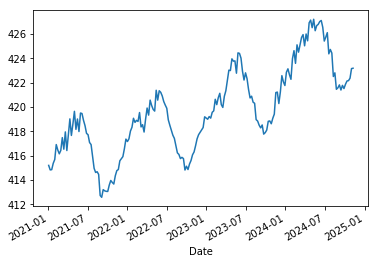

In [9]:
data[-200:].plot()

Les oscillations semblent avoir une période d'un an (variations annuelles). Le pic de concentration a lieu au début de l'été, soit vers juin. Afin d'affiner l'analyse, nous pouvons considérer que sur un an, l'évolution de $f$ peut s'apparenter à une droite (sa tangente au milieu de l'an donné).

Concentrons-nous sur la dernière année : entre automne 2023 et automne 2024. Nous cherchons à isoler les données entre début septembre 2023 et fin septembre 2024, afin d'être certains d'englober toute la variation annuelle.

In [10]:
period1 = pd.Period(pd.Timestamp(2023, 9, 1), 'W')
period2 = pd.Period(pd.Timestamp(2024, 9, 30), 'W')
data_last_year = full_data[full_data[((full_data.index >= period1.start_time) & (full_data.index <= period1.end_time))].index[0]:
     full_data[((full_data.index >= period2.start_time) & (full_data.index <= period2.end_time))].index[0]]

Vérifions si nous comprenons bien toute l'année voulue :

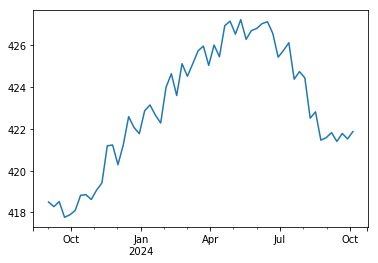

In [11]:
data_last_year.plot()

Parfait. Maintenant, trouvons les deux données minimales (au début et à la fin de l'oscillation respectivement) afin de trouver la pente de $f$. $f$ étant croissante, le premier minimum est le minimum de l'année isolée. Les valeurs de début d'année 2024 étant supérieures au deuxième minimum, nous pouvons le trouver en contraignant `year == 2024`. On vérifie par la suite que les minima trouvés sont bien ceux attendus par l'analyse graphique.

Nous pourrons ensuite enlever cette contribution lente pour avoir une oscillation brute, et mesurer son amplitude.

__Remarque__ : nous faisons en fait un traitement de signal à la main ; nous aurrions aussi pu utiliser un filtre passe-haut avec une coupure de fréquence choisie soigneusement pour obtenir le même résultat. Ce document étant censé être accessible à tous, il est préférable de ne pas utiliser de méthode trop technique.

2023-09-23    417.77
Freq: 7D, dtype: float64
2024-09-14    421.39
Freq: 7D, dtype: float64
3.57980392156864


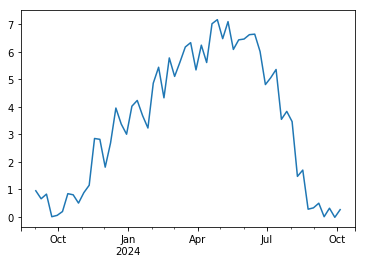

In [19]:
min_2023 = data_last_year.where(data_last_year == min(data_last_year)).dropna()
data_last_year_2024 = data_last_year[data_last_year.index.year == 2024]
min_2024 = data_last_year_2024.where(data_last_year_2024 == min(data_last_year_2024)).dropna()
print(min_2023)
print(min_2024)

# Pour définir la droite correspondant à l'évolution de f(t), il est plus simple de repasser sur des indices numériques
data_last_year_filtered = pd.Series(data=data_last_year.values, index=range(len(data_last_year)))
dy = min_2024.values[0] - min_2023.values[0]
min_2023_filtered = data_last_year_filtered.where(data_last_year_filtered == min(data_last_year_filtered)).dropna()
data_last_year_filtered_2024 = data_last_year_filtered[data_last_year.index.year == 2024]
min_2024_filtered = data_last_year_filtered_2024.where(data_last_year_filtered_2024 == min(data_last_year_filtered_2024)).dropna()
dx = min_2024_filtered.index[0] - min_2023_filtered.index[0]
data_f = min_2023.values[0] + (dy / dx) * (range(len(data_last_year)) - min_2023_filtered.index[0])
f = pd.Series(data=data_f, index=data_last_year.index)
data_last_year_filtered.index = data_last_year.index

data_last_year_filtered -= f
data_last_year_filtered.index = data_last_year.index
amp = data_last_year_filtered.max() / 2
print(amp)
data_last_year_filtered.plot()

Nous obtenons une amplitude de 3.6 ppm, soit un écart entre minimum et maximum annuel d'environ 7.2 ppm. De plus, nous pouvons voir que pour la variation annuelle, la croissance est plus lente que la décroissance, et donc le maximum n'est pas exactement 6 mois après le minimum. Nous négligerons cette déviation par rapport à notre modèle.

### Modélisation de l'évolution en arrière-plan

Nous pouvons désormais isoler l'évolution lente d'arrière-plan $f(t)$ en moyennant sur un an les valeurs (on recrée artificiellement un filtre passe-bas) :

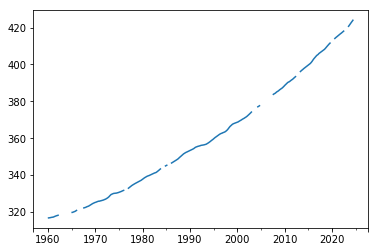

In [13]:
filled_data = full_data.copy()
filled_data[interpolated_marks == 1] = np.nan
rolling_base = pd.Series(data=filled_data.values, index=range(len(filled_data)))
rolling_mean = rolling_base.rolling(window=52, center=True).mean()
rolling_mean.index = full_index
rolling_mean.plot()

On voit bien que la dérivée de cette courbe est strictement croissante. Une modélisation simple est par exemple un polynôme du second degré en temps : $f(t)=at^2+bt+c$. En utilisant la fonction `numpy.polyfit`, nous pouvons retrouver les paramètres $a$, $b$ et $c$ correspondant à notre jeu de données :

2.868211382735772e-16 4.000936624074663e-09 0.002605559356891354


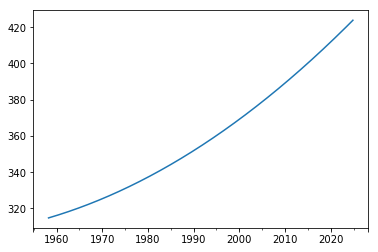

In [14]:
t = np.arange(len(rolling_mean))
rolling = pd.Series(data=rolling_mean.values, index=t).dropna()
p = np.polyfit(rolling.index, rolling.values, 2, cov=True)
a = p[0][0]
b = p[0][1]
c = p[0][2]
err = p[1]
a_err = err[0, 0]
b_err = err[1, 1]
c_err = err[2, 2]
f = pd.Series(data=a*t**2+b*t+c, index=full_index)
f.plot()
print(a_err, b_err, c_err)

Nous retrouvons bien la dynamique de fond, qui plus est avec des incertitudes assez faibles sur les coefficients calculés. 

### Prédiction de la dynamique complète

Nous pouvons maintenant recréer la dynamique totale de $C(t) = f(t) + A\cos\Big(\frac{2\pi}{T}(t-t_0)\Big)$, avec $t_0$ fixé à la mi-mars 1959 (6 mois après la mi-septembre), soit `t[50]` :

In [15]:
print(full_index[:52], full_index[50])

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31', '1958-06-07', '1958-06-14',
               '1958-06-21', '1958-06-28', '1958-07-05', '1958-07-12',
               '1958-07-19', '1958-07-26', '1958-08-02', '1958-08-09',
               '1958-08-16', '1958-08-23', '1958-08-30', '1958-09-06',
               '1958-09-13', '1958-09-20', '1958-09-27', '1958-10-04',
               '1958-10-11', '1958-10-18', '1958-10-25', '1958-11-01',
               '1958-11-08', '1958-11-15', '1958-11-22', '1958-11-29',
               '1958-12-06', '1958-12-13', '1958-12-20', '1958-12-27',
               '1959-01-03', '1959-01-10', '1959-01-17', '1959-01-24',
               '1959-01-31', '1959-02-07', '1959-02-14', '1959-02-21',
               '1959-02-28', '1959-03-07', '1959-03-14', '1959-03-21'],
              dtype='datetime64[ns]', freq='7D') 1959-03-14 00:00:00


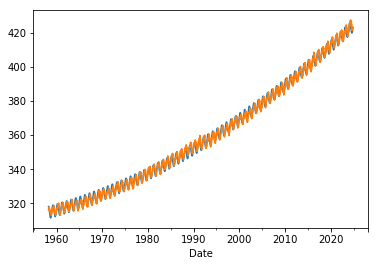

In [16]:
C = f + pd.Series(data=amp * np.cos(2 * np.pi * (t-50) / 52.1429), index=f.index)
C.plot()
data.plot()

Notre modélisation a l'air de bien fonctionner. Voyons maintenant les prédictions en 2030 (nous sommes déjà presque en 2025...) :

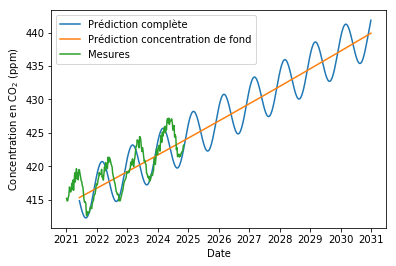

In [17]:
index_extended = pd.date_range(start=data.index[0], end=pd.Timestamp(2031, 1, 1), freq='7D')
t_extended = np.arange(len(index_extended))
f_extended = pd.Series(data=a*t_extended**2+b*t_extended+c, index=index_extended)
C_extended = f_extended + pd.Series(data=amp * np.cos(2 * np.pi * (t_extended-50) / 52.1429), index=f_extended.index)
fig, ax = plt.subplots(1)
ax.plot(C_extended[-500:], label='Prédiction complète')
ax.plot(f_extended[-500:], label='Prédiction concentration de fond')
ax.plot(data[-200:], label='Mesures')
ax.set_xlabel("Date")
ax.set_ylabel(r"Concentration en CO$_2$ (ppm)")
ax.legend()
plt.show()

La valeur de la concentration en CO$_2$ prédite pour 2030 est la moyenne de `C_extended` sur cette année :

In [18]:
start_date = pd.Timestamp(2030, 1, 1)
end_date = pd.Timestamp(2030, 12, 31)
C_2030 = C_extended[(index_extended > start_date) & (index_extended < end_date)].mean()
print(C_2030)

438.5762020682022


La valeur prédite est de $438.6~\mathrm{ppm}$ pour 2030. Néanmoins, notre modèle polynomial n'est peut-être pas le bon. En effet, comme on peut le voir sur le graphique précédent, la hausse semble s'accélérer sur les deux dernières années mesurées. Cela peut notamment être dû aux déséquilibres des échanges de CO$_2$ à cause du réchauffement global, ayant atteint tout juste le seuil des $1.5~°\mathrm{C}$ en 2024...